<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading" data-toc-modified-id="Loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Graph" data-toc-modified-id="Graph-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Graph</a></span><ul class="toc-item"><li><span><a href="#original-graph" data-toc-modified-id="original-graph-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>original graph</a></span></li><li><span><a href="#MST" data-toc-modified-id="MST-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>MST</a></span></li><li><span><a href="#Features-centrality-from-MST" data-toc-modified-id="Features-centrality-from-MST-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Features centrality from MST</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Clustering</a></span></li></ul></li><li><span><a href="#Comparsion-between-strategies" data-toc-modified-id="Comparsion-between-strategies-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparsion between strategies</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#choice-from-clusters" data-toc-modified-id="choice-from-clusters-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>choice from clusters</a></span></li></ul></li></ul></li><li><span><a href="#Comparsion-between-strategies" data-toc-modified-id="Comparsion-between-strategies-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparsion between strategies</a></span></li><li><span><a href="#evaluation" data-toc-modified-id="evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>evaluation</a></span></li></ul></div>

In [44]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# Loading

In [45]:
# SP500=pd.read_csv('/Users/zhaoyang/Desktop/800 project/code/S&P 500 stocks.csv')
SP100=pd.read_csv('S&P100index.csv') 
SP100['Ticker'] = SP100.Ticker.apply(lambda x: x.split(' ')[0])
# SP100[['Ticker', 'Weight']]

In [46]:
Ticker = SP100['Ticker'].to_list()

In [47]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020, 1, 1)
StockPrices = web.DataReader(Ticker, "yahoo", start, end)
StockPrices = StockPrices['Adj Close']
StockPrices = StockPrices.fillna(method = 'bfill').dropna(axis=1,how = 'all').fillna(method = 'ffill')
# [i for i in ['SCG','XL','PX']  if i in StockPrices.columns]
# StockPrices.drop(columns=['SCG','XL','PX'],inplace=True)
stocknumbers = StockPrices.shape[1]

/Users/zhaoyang/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BRK/B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


# Preprocessing

In [48]:
StockReturns = StockPrices.pct_change().dropna()
# 打印前n行数据
# print(StockReturns.head())
# 将收益率数据拷贝到新的变量 stock_return 中，这是为了后续调用的方便
stock_return = StockReturns.copy()

In [49]:
# 设置组合权重，存储为numpy数组类型
b = np.random.random(stocknumbers)
portfolio_weights = b / b.sum()
# 计算加权的股票收益
WeightedReturns = stock_return.mul(portfolio_weights, axis=1)
# 计算投资组合的收益
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)
# 打印前n行数据
# print(StockReturns.head())

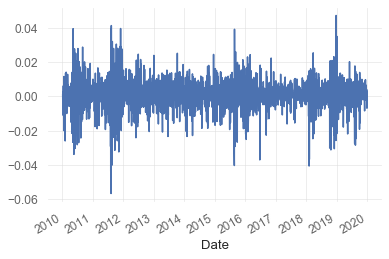

In [50]:
# 绘制组合收益随时间变化的图
StockReturns.Portfolio.plot()
plt.show()

# 定义累积收益曲线绘制函数
def cumulative_returns_plot(name_list):
    for name in name_list:
        CumulativeReturns = ((1 + StockReturns[name]).cumprod() - 1)
        CumulativeReturns.plot(label=name)
    plt.legend()
    plt.show()

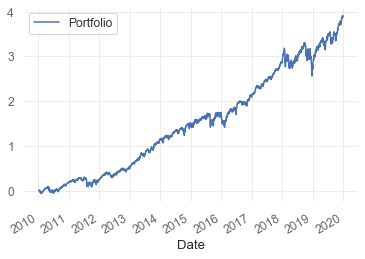

Symbols         MSFT      AAPL      AMZN     GOOGL  TSLA      GOOG        HD  \
Date                                                                           
2010-01-05  0.000323  0.001729  0.005900 -0.004404   0.0 -0.004404  0.007324   
2010-01-06 -0.006137 -0.015906 -0.018116 -0.025209   0.0 -0.025209 -0.003462   
2010-01-07 -0.010400 -0.001849 -0.017013 -0.023280   0.0 -0.023280  0.011814   
2010-01-08  0.006897  0.006648  0.027077  0.013331   0.0  0.013331 -0.004808   
2010-01-11 -0.012720 -0.008821 -0.024041 -0.001512   0.0 -0.001512 -0.028295   

Symbols         NVDA  PYPL   FB  ...      CHTR       WFC        CL      GILD  \
Date                             ...                                           
2010-01-05  0.014603   0.0  0.0  ...  0.000000  0.027453  0.008087 -0.000924   
2010-01-06  0.006397   0.0  0.0  ...  0.000000  0.001425 -0.002275  0.034674   
2010-01-07 -0.019598   0.0  0.0  ...  0.000000  0.036286 -0.003960  0.002457   
2010-01-08  0.002161   0.0  0.0  ... -0

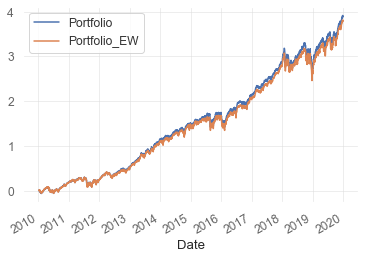

In [51]:
# 计算累积的组合收益，并绘图
cumulative_returns_plot(['Portfolio'])

# 设置投资组合中股票的数目
numstocks = stocknumbers
# 平均分配每一项的权重
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
# 计算等权重组合的收益
StockReturns['Portfolio_EW'] = stock_return.mul(portfolio_weights_ew, axis=1).sum(axis=1)
# 打印前5行数据
print(StockReturns.head())
# 绘制累积收益曲线
cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

Symbols      MSFT      AAPL      AMZN     GOOGL      TSLA      GOOG        HD  \
Symbols                                                                         
MSFT     1.000000  0.457249  0.488588  0.536245  0.248883  0.540878  0.445883   
AAPL     0.457249  1.000000  0.397436  0.463076  0.236400  0.464214  0.373585   
AMZN     0.488588  0.397436  1.000000  0.557892  0.275304  0.557424  0.382191   
GOOGL    0.536245  0.463076  0.557892  1.000000  0.255382  0.995397  0.409809   
TSLA     0.248883  0.236400  0.275304  0.255382  1.000000  0.253733  0.224111   
...           ...       ...       ...       ...       ...       ...       ...   
GILD     0.322238  0.240595  0.294449  0.321001  0.204037  0.318595  0.333338   
AIG      0.372905  0.310077  0.325633  0.344386  0.163717  0.343684  0.413303   
KHC      0.158619  0.168810  0.126120  0.161522  0.089266  0.159554  0.170295   
ABBV     0.290747  0.182157  0.212553  0.262278  0.158351  0.261773  0.243109   
COP      0.374904  0.318933 

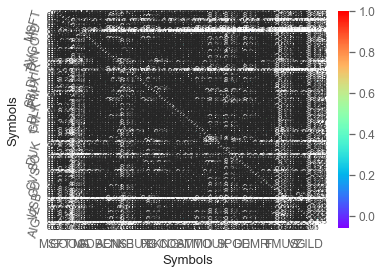

In [52]:
# 计算相关矩阵
correlation_matrix = stock_return.corr()
# 输出相关矩阵
print(correlation_matrix)

import seaborn as sns
#创建热图
sns.heatmap(correlation_matrix,annot=True,cmap='rainbow',linewidths=1.0,annot_kws={'size':8})
plt.xticks(rotation=0)
plt.yticks(rotation=75)
plt.show()

In [53]:
# 计算协方差矩阵
cov_mat = stock_return.cov()
# 年化协方差矩阵
cov_mat_annual = cov_mat * 252
# 输出协方差矩阵
print(cov_mat_annual)

Symbols      MSFT      AAPL      AMZN     GOOGL      TSLA      GOOG        HD  \
Symbols                                                                         
MSFT     0.051621  0.026750  0.034389  0.029659  0.028404  0.030046  0.020066   
AAPL     0.026750  0.066298  0.031701  0.029026  0.030576  0.029224  0.019053   
AMZN     0.034389  0.031701  0.095966  0.042072  0.042840  0.042220  0.023451   
GOOGL    0.029659  0.029026  0.042072  0.059260  0.031228  0.059244  0.019759   
TSLA     0.028404  0.030576  0.042840  0.031228  0.252321  0.031162  0.022297   
...           ...       ...       ...       ...       ...       ...       ...   
GILD     0.020525  0.017367  0.025572  0.021907  0.028733  0.021837  0.018509   
AIG      0.025949  0.024452  0.030895  0.025676  0.025187  0.025735  0.025072   
KHC      0.006495  0.007833  0.007041  0.007086  0.008081  0.007030  0.006079   
ABBV     0.015163  0.010766  0.015114  0.014656  0.018258  0.014691  0.011053   
COP      0.023064  0.022236 

In [54]:
# 设置组合权重，存储为numpy数组类型
b = np.random.random(stocknumbers)
portfolio_weights = b / b.sum()
# 计算投资组合的标准差
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.14111424383192592


In [55]:
# 设置模拟的次数
number = 10000
# 设置空的numpy数组，用于存储每次模拟得到的权重、收益率和标准差
random_p = np.empty((number, StockPrices.shape[1]+2))
# 设置随机数种子，这里是为了结果可重复
np.random.seed(7)

In [56]:
# 循环模拟10000次随机的投资组合
for i in range(number):
    # 生成5个随机数，并归一化，得到一组随机的权重数据
    randomn = np.random.random(stocknumbers)
    random_weight = randomn / np.sum(randomn)

    # 计算年平均收益率
    mean_return = stock_return.mul(random_weight, axis=1).sum(axis=1).mean()
    annual_return = (1 + mean_return) ** 252 - 1

    # 计算年化标准差，也成为波动率
    random_volatility = np.sqrt(np.dot(random_weight.T, np.dot(cov_mat_annual, random_weight)))

    # 将上面生成的权重，和计算得到的收益率、标准差存入数组random_p中
    random_p[i][:StockPrices.shape[1]] = random_weight
    random_p[i][StockPrices.shape[1]] = annual_return
    random_p[i][StockPrices.shape[1]+1] = random_volatility

# 将Numpy数组转化为DataF数据框
RandomPortfolios = pd.DataFrame(random_p)
# 设置数据框RandomPortfolios每一列的名称
RandomPortfolios.columns = [ticker + '_weight' for ticker in StockPrices.columns] + ['Returns', 'Volatility']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


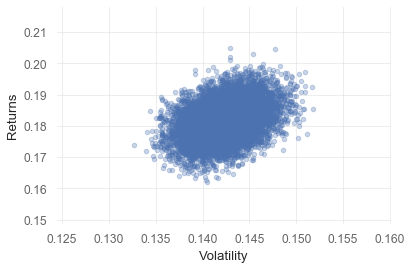

In [57]:
# 绘制散点图
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


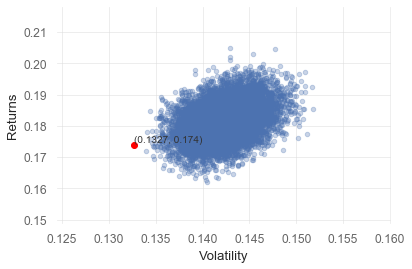

In [58]:
# 找到标准差最小数据的索引值
min_index = RandomPortfolios.Volatility.idxmin()

# 在收益-风险散点图中突出风险最小的点
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[min_index, 'Volatility']
y = RandomPortfolios.loc[min_index, 'Returns']
plt.scatter(x, y, color='red')
# 将该点坐标显示在图中并保留四位小数
plt.text(np.round(x, 4), np.round(y, 4), (np.round(x, 4), np.round(y, 4)), ha='left', va='bottom', fontsize=10)
plt.show()

In [59]:
# 设置投资组合中股票的数目
numstocks = stocknumbers
# 提取最小波动组合对应的权重, 并转换成Numpy数组
GMV_weights = np.array(RandomPortfolios.iloc[min_index, 0:numstocks])
# 计算GMV投资组合收益
StockReturns['Portfolio_GMV'] = stock_return.mul(GMV_weights, axis=1).sum(axis=1)
#输出风险最小投资组合的权重
print(GMV_weights)

[9.56295973e-03 6.39955492e-03 7.83221479e-03 2.11743799e-02
 2.21012121e-03 2.98415743e-03 1.06446595e-02 6.78811664e-03
 3.97742218e-03 1.28468181e-02 2.50912567e-03 1.47057755e-03
 1.72902377e-02 7.64920807e-03 8.74266972e-03 9.58839122e-03
 1.74904610e-02 1.23669965e-05 2.57389657e-03 1.46508918e-02
 7.49126777e-03 2.25994650e-04 4.84836104e-03 8.93330345e-03
 4.40927622e-04 1.87101963e-02 1.10316871e-02 4.27977160e-03
 8.60788441e-03 1.39726453e-02 1.45431086e-02 9.88744553e-03
 1.57840806e-02 1.61231632e-02 1.17684629e-02 5.09833043e-03
 8.01267721e-04 1.96189107e-02 1.44113685e-02 5.21110965e-03
 1.65012030e-02 8.27198268e-04 1.50915615e-03 1.26446662e-02
 3.72194850e-03 1.33445872e-02 1.48234865e-02 1.14723331e-02
 3.84467915e-03 9.25359836e-03 1.80435783e-02 4.07983640e-03
 7.18123462e-03 7.75533695e-03 1.59127607e-02 1.16321925e-02
 1.89079715e-02 1.34947677e-02 1.14517520e-02 5.68459296e-03
 1.88936779e-02 2.00276492e-03 1.92491577e-02 1.34692275e-02
 2.10733976e-02 1.027626

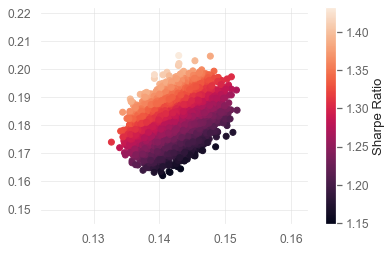

In [60]:
# 设置无风险回报率为0
risk_free = 0
# 计算每项资产的夏普比率
RandomPortfolios['Sharpe'] = (RandomPortfolios.Returns - risk_free) / RandomPortfolios.Volatility
# 绘制收益-标准差的散点图，并用颜色描绘夏普比率
plt.scatter(RandomPortfolios.Volatility, RandomPortfolios.Returns, c=RandomPortfolios.Sharpe)
plt.colorbar(label='Sharpe Ratio')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


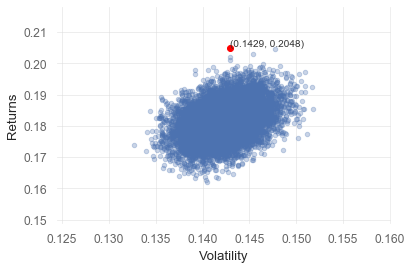

In [61]:
# 找到夏普比率最大数据对应的索引值
max_index = RandomPortfolios['Sharpe'].idxmax()
# 在收益-风险散点图中突出夏普比率最大的点
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[max_index,'Volatility']
y = RandomPortfolios.loc[max_index,'Returns']
plt.scatter(x, y, color='red')
#将该点坐标显示在图中并保留四位小数
plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=10)
plt.show()

In [62]:
# 设置投资组合中股票的数目
numstocks = stocknumbers
# 提取最大夏普比率组合对应的权重，并转化为numpy数组
MSR_weights = np.array(RandomPortfolios.iloc[max_index, 0:numstocks])
# 计算MSR组合的收益
StockReturns['Portfolio_MSR'] = stock_return.mul(MSR_weights, axis=1).sum(axis=1)
#输出夏普比率最大的投资组合的权重
print(MSR_weights)

[0.0119387  0.02219714 0.02096901 0.0058734  0.01826314 0.02172907
 0.00529651 0.00677593 0.01466531 0.02229452 0.00325157 0.00644731
 0.02211912 0.01155423 0.01087151 0.0079773  0.00173596 0.01248402
 0.01560461 0.02162675 0.00678882 0.00153657 0.00870905 0.02009062
 0.00437159 0.01248894 0.0060655  0.01666063 0.01938866 0.01895414
 0.0124196  0.0036501  0.02123676 0.01581999 0.01566852 0.02023577
 0.0035398  0.00240896 0.00497865 0.02060259 0.01137992 0.00850427
 0.00132066 0.02104273 0.01554965 0.01817068 0.00837962 0.00435959
 0.00069225 0.01472252 0.00263669 0.00175446 0.00753448 0.01060537
 0.01996403 0.00186658 0.01292273 0.00965248 0.01688148 0.00635002
 0.01867052 0.01132007 0.00937861 0.00145864 0.002224   0.00179948
 0.00522724 0.00541194 0.00200008 0.00882417 0.01354769 0.01612475
 0.00657658 0.00387725 0.01146221 0.00527131 0.00140487 0.00975428
 0.01617271 0.00701693 0.00308721 0.00052302 0.00462484 0.01198184
 0.00237973 0.02028956 0.00206227 0.02032468 0.00848553 0.0010

In [63]:
stock_return.to_csv('spreturn.csv')

# Graph

In [64]:
import pandas as pd
from networkx.algorithms import tree
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

stock_return = pd.read_csv('spreturn.csv', index_col='Date')
cov_mtx = stock_return.corr()
dist = np.sqrt((1-cov_mtx)*1/2)

## original graph

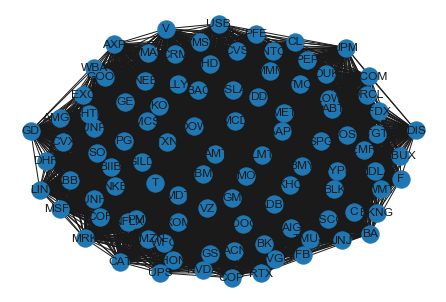

In [65]:
G = nx.Graph(dist)
nx.draw(G, with_labels=True)
plt.show()

## MST

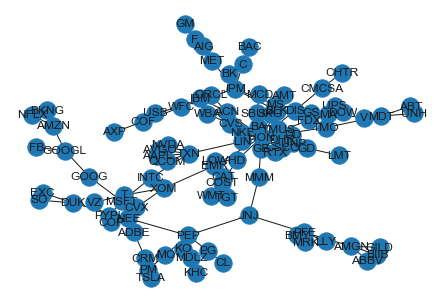

,MSFT,AAPL,AMZN,GOOGL,TSLA,GOOG,HD,NVDA,PYPL,FB,...,VZ,BK,CHTR,WFC,CL,GILD,AIG,KHC,ABBV,COP
MSFT,0.0,0.0,0.000000,0.000000,0.0,0.479125,0.0,0.0,0.545688,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAPL,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AMZN,0.0,0.0,0.000000,0.470164,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GOOGL,0.0,0.0,0.470164,0.000000,0.0,0.047974,0.0,0.0,0.000000,0.571707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TSLA,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GILD,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIG,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KHC,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABBV,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
mst_tmp = tree.minimum_spanning_edges(G, algorithm="kruskal", data=False)
mst = sorted(sorted(e) for e in mst_tmp)
G_mst = nx.Graph(mst)
nx.draw(G_mst, with_labels=True)
plt.show()

dist2 = dist.copy()
for idx, col in ([[j, i] for i, j in mst] + mst):
    dist2.loc[idx, col] = dist2.loc[idx, col]*2
    
mst_dist = dist2 - dist
mst_dist

## Features centrality from MST

In [67]:
def show_cum_ret(dt, ticker, weight, name = ''):
    assert len(tickers) == len(weight)
    daily_ret = (dt[tickers] * weight).sum(axis=1)
    CumulativeReturns = ((1 + daily_ret).cumprod() - 1)
    CumulativeReturns.rename(name, inplace=True)
    CumulativeReturns.plot(legend=True)
    return daily_ret, CumulativeReturns

def get_weight_from_centrality(centrality_dict):
    centrality_df = pd.Series(centrality_dict)
    centrality_portoflio = (centrality_df/centrality_df.sum())
    tickers = centrality_portoflio.index
    weight = centrality_portoflio.values
    return centrality_portoflio, tickers, weight


eigenvector_dict = nx.eigenvector_centrality(G_mst, max_iter=600) # Run eigenvector centrality
betweenness_dict = nx.betweenness_centrality(G_mst) # Run betweenness centrality


In [77]:
# # # Assign each to an attribute in your network
# nx.set_node_attributes(G_mst, name = 'betweenness', values = betweenness_dict)
# nx.set_node_attributes(G_mst, name ='eigenvector', values = eigenvector_dict)

# eigenvector_centrality_portoflio2, tickers, weight = get_weight_from_centrality(eigenvector_dict)
# tmp = (1/(0.001+weight))
# inverse_weight = tmp/tmp.sum()
# show_cum_ret(dt, tickers, inverse_weight, "inverse_eigenvector_centrality_portoflio")

# eigenvector_centrality_portoflio, tickers, weight = get_weight_from_centrality(eigenvector_dict)
# show_cum_ret(dt, tickers, weight, "eigenvector_centrality_portoflio")

# betweenness_centrality_portoflio, tickers, weight = get_weight_from_centrality(betweenness_dict)
# show_cum_ret(dt, tickers, weight, "betweenness_centrality_portoflio")

# plt.show()

In [92]:
eigenvector_centrality_df = pd.DataFrame.from_dict(eigenvector_dict, orient='index')
betweenness_centrality = pd.DataFrame.from_dict(betweenness_dict, orient='index')
eigenvector_centrality_df.columns = ["eigenvector_centrality"]
betweenness_centrality.columns = ["betweenness_centrality"]
features = pd.concat([cov_mtx, eigenvector_centrality_df, betweenness_centrality], axis=1)
features.head()

,MSFT,AAPL,AMZN,GOOGL,TSLA,GOOG,HD,NVDA,PYPL,FB,...,CHTR,WFC,CL,GILD,AIG,KHC,ABBV,COP,eigenvector_centrality,betweenness_centrality
MSFT,1.000000,0.457249,0.488588,0.536245,0.248883,0.540878,0.445883,0.452763,0.404449,0.275029,...,0.291050,0.455932,0.337453,0.322238,0.372905,0.158619,0.290747,0.374904,0.008911,0.189033
AAPL,0.457249,1.000000,0.397436,0.463076,0.236400,0.464214,0.373585,0.385900,0.308912,0.243799,...,0.263149,0.367324,0.249690,0.240595,0.310077,0.168810,0.182157,0.318933,0.036275,0.000000
AMZN,0.488588,0.397436,1.000000,0.557892,0.275304,0.557424,0.382191,0.370495,0.320531,0.328987,...,0.250011,0.351391,0.249534,0.294449,0.325633,0.126120,0.212553,0.275760,0.000095,0.040198
GOOGL,0.536245,0.463076,0.557892,1.000000,0.255382,0.995397,0.409809,0.408513,0.346554,0.346302,...,0.268284,0.407606,0.290421,0.321001,0.344386,0.161522,0.262278,0.317332,0.000425,0.078953
TSLA,0.248883,0.236400,0.275304,0.255382,1.000000,0.253733,0.224111,0.251276,0.195633,0.185731,...,0.171425,0.214311,0.152907,0.204037,0.163717,0.089266,0.158351,0.209536,0.000082,0.000000


## Clustering

/Users/zhaoyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


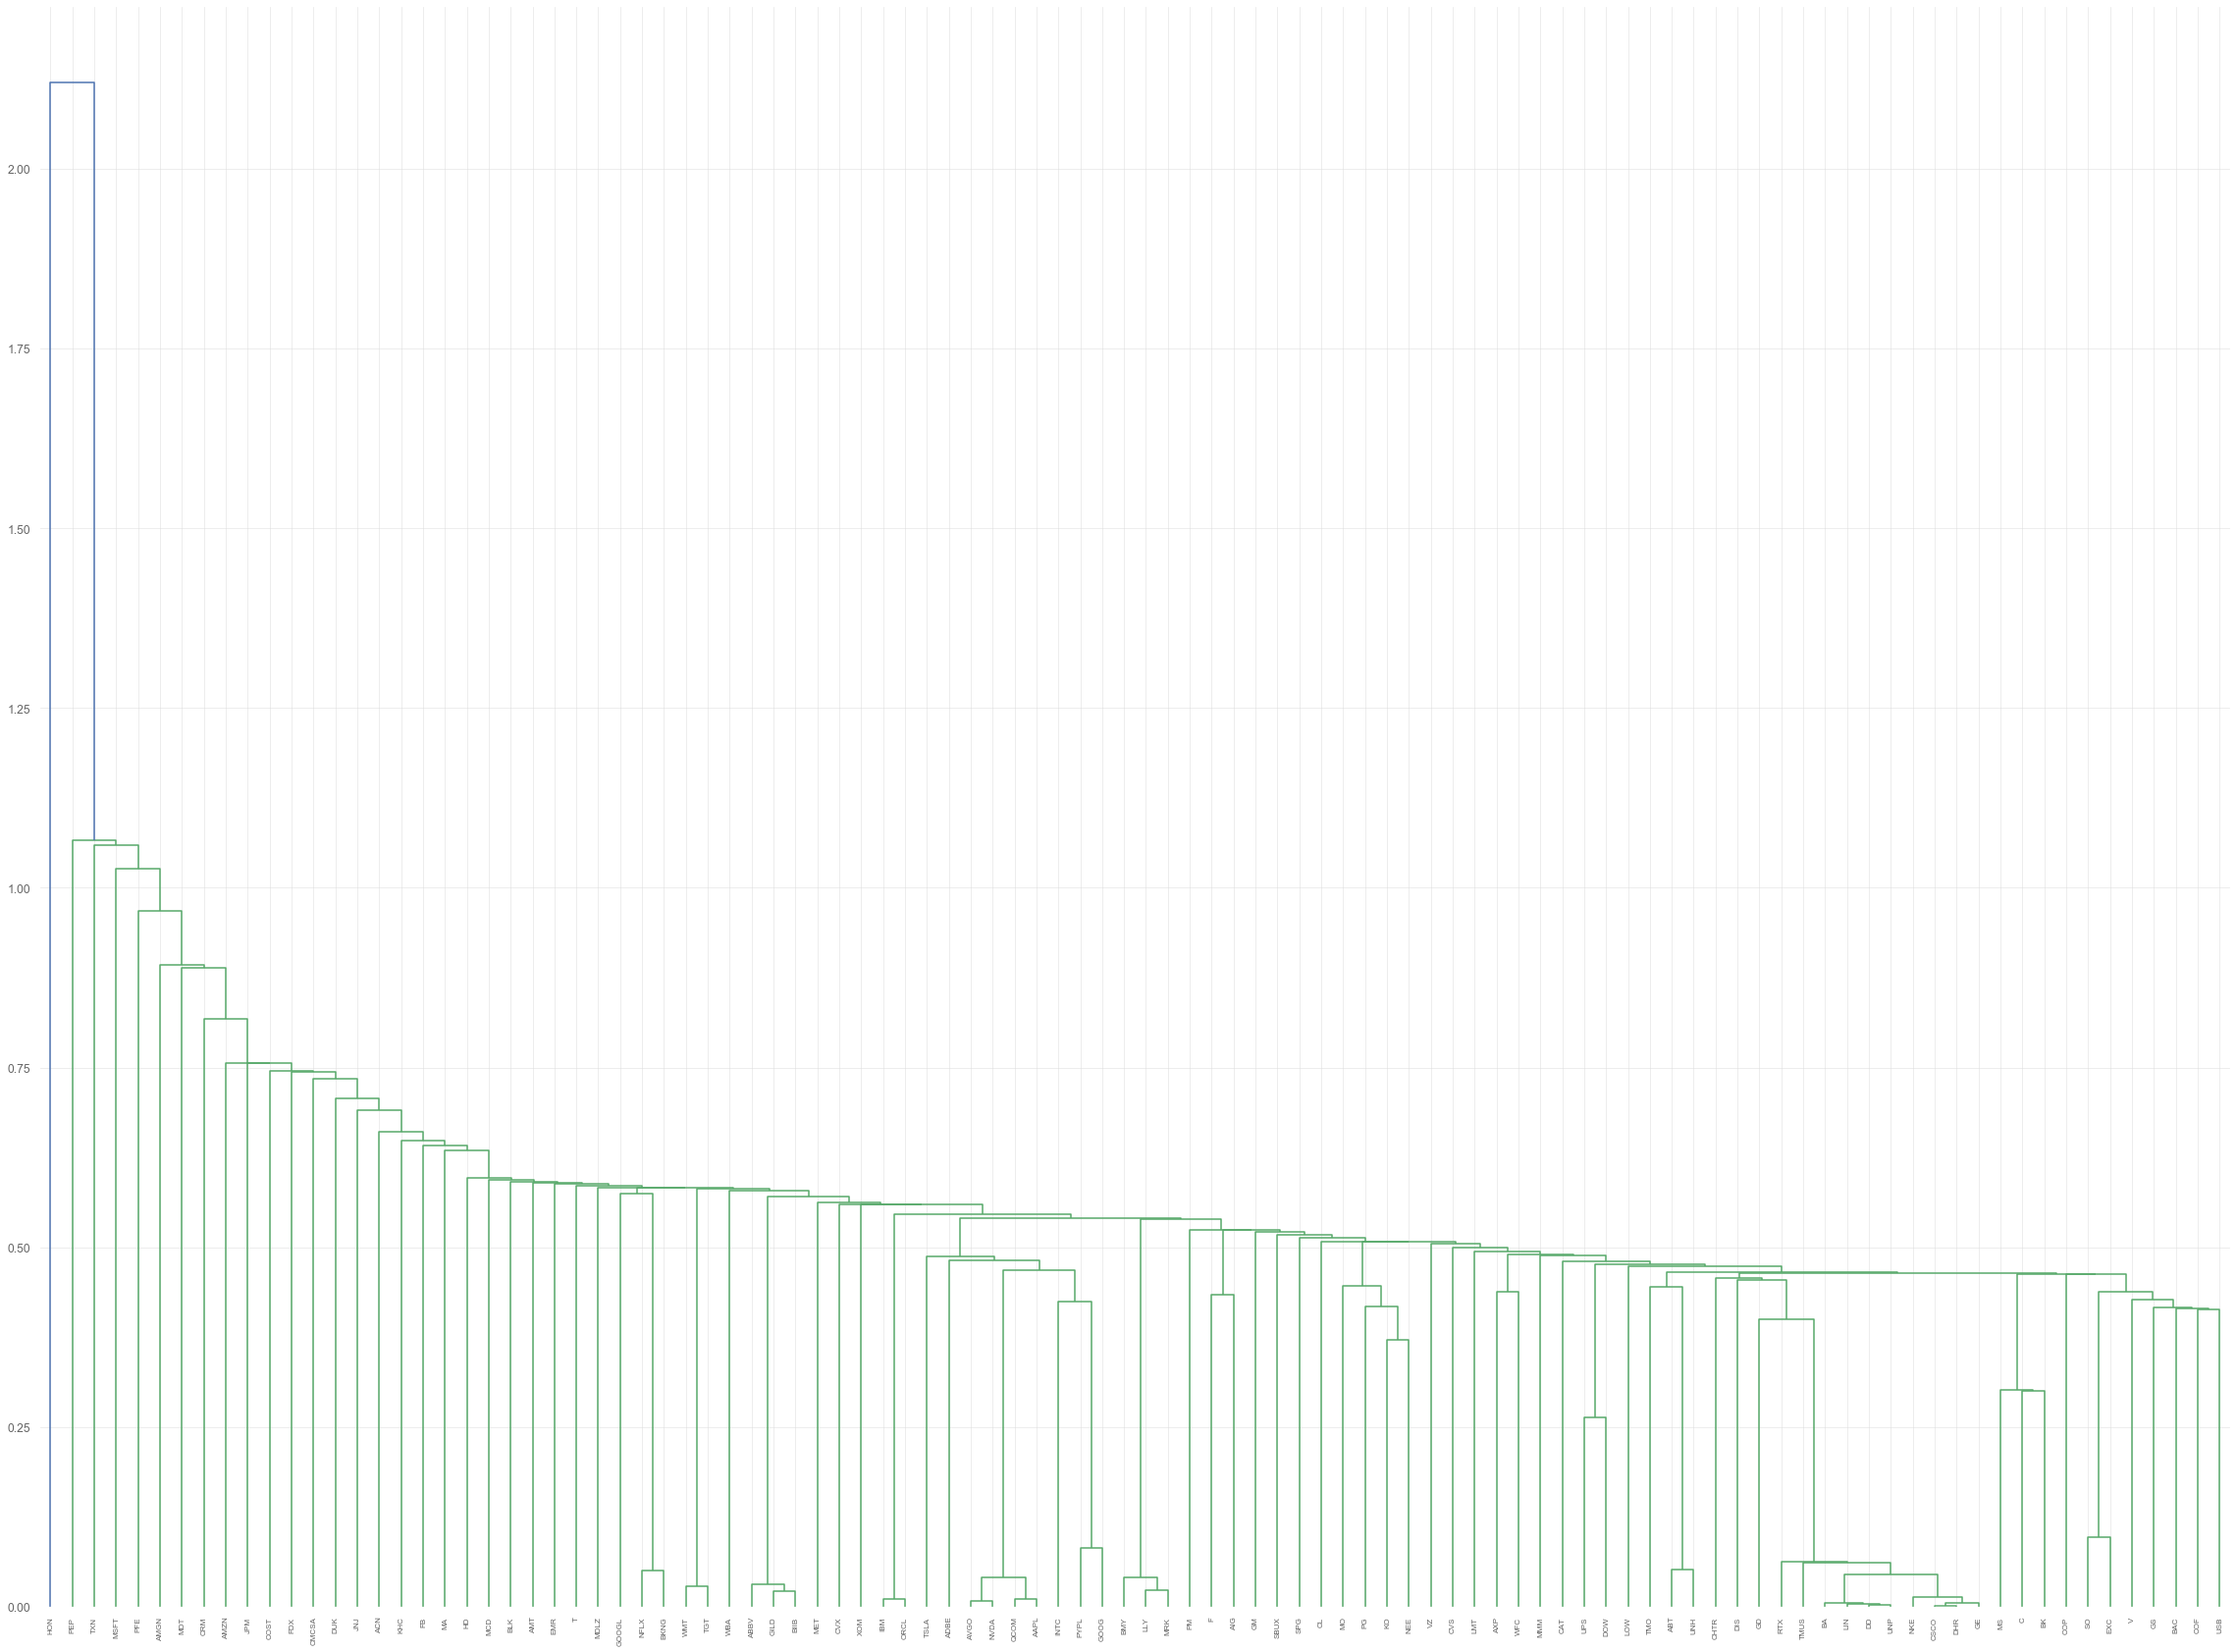

In [69]:
import matplotlib.pyplot as mpl,seaborn as sns 
import scipy.cluster.hierarchy as sch 
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import fcluster
import quantstats as qs
# extend pandas functionality with metrics, etc.
qs.extend_pandas()


# link= sch.linkage(ssd.squareform(dist,force='tovector'),optimal_ordering=True,method='single') 
link= sch.linkage(mst_dist,optimal_ordering=True,method='single')
# link= sch.linkage(eigenvector_centrality_df,optimal_ordering=True,method='single') 
cols = mst_dist.columns # [sch.leaves_list(link)]
plt.figure(figsize=(40,30))
dendro = sch.dendrogram(link,leaf_rotation=90.,leaf_font_size=8., labels=cols,distance_sort=True) 
plt.show()

# Comparsion between strategies

In [70]:
clusters = fcluster(link, t=0.6, criterion='distance')
ticker_clusters = pd.DataFrame([mst_dist.iloc[sch.leaves_list(link)].columns, clusters], index=['Ticker', 'clusters']).T

In [93]:
print("num of clusters:", ticker_clusters['clusters'].max())

num of clusters: 20


### choice from clusters

In [72]:
flatten = lambda l: eval('[%s]'%repr(l).replace('[', '').replace(']', ''))

picks = 2
picked_ticker_from_clusters = []
for num in set(clusters):
    picked_ticker_from_clusters.append(ticker_clusters[ticker_clusters['clusters']==num].Ticker.tolist()[0:picks])
print(picked_ticker_from_clusters)
# ticker_clusters

[['AAPL', 'GOOGL'], ['MA'], ['FB'], ['KHC'], ['ACN'], ['JNJ'], ['DUK'], ['CMCSA'], ['FDX'], ['COST'], ['JPM'], ['AMZN'], ['CRM'], ['MDT'], ['AMGN'], ['PFE'], ['MSFT'], ['TXN'], ['PEP'], ['HON']]


# Comparsion between strategies

In [73]:
def plot_index():
    sp100_index_daily_ret = web.DataReader('^OEX', "yahoo", start, end)['Adj Close'].pct_change().dropna()
    d = ((1 + sp100_index_daily_ret).cumprod() - 1).rename('SP100_index')
    d.index = d.index.strftime("%Y-%m-%d")
    d.plot(legend=True)
    return sp100_index_daily_ret


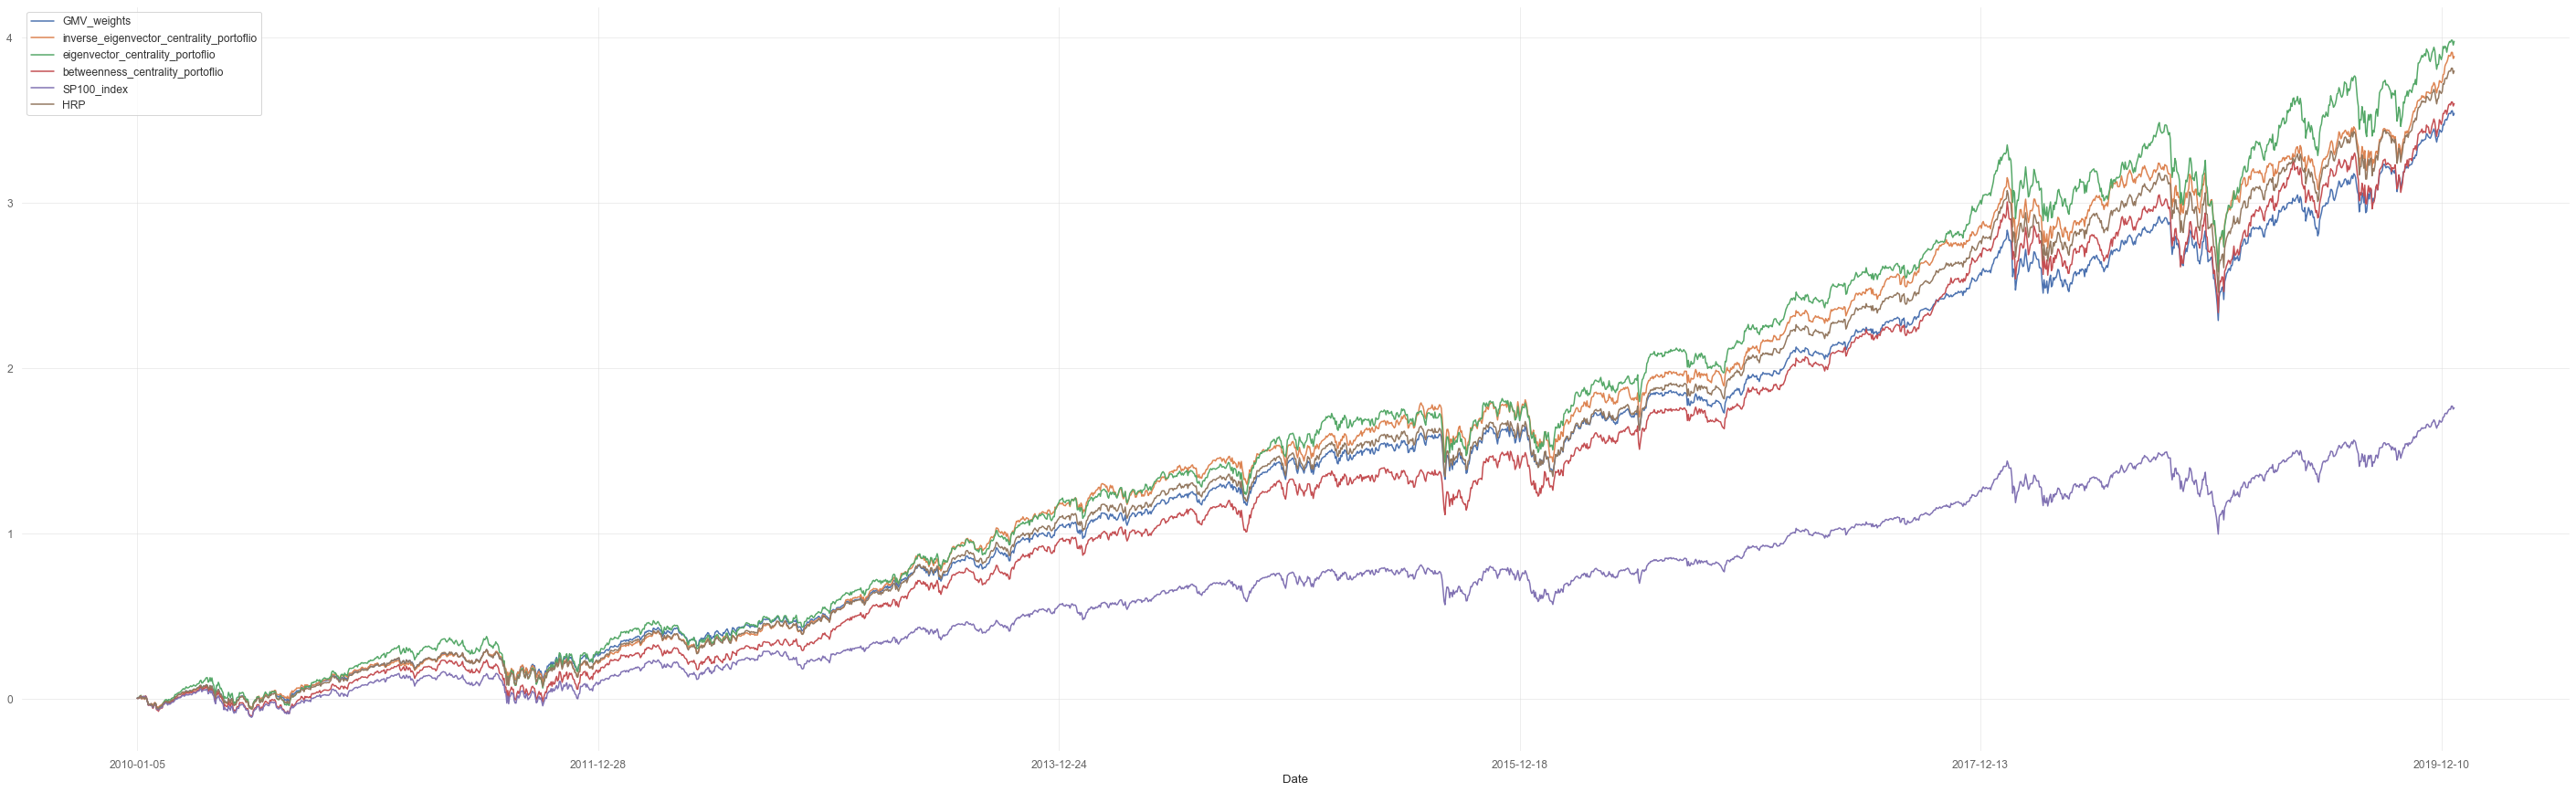

In [74]:
plt.figure(figsize=(50,15))

tickers = stock_return.columns
weight = portfolio_weights_ew

tickers = stock_return.columns
weight = GMV_weights
show_cum_ret(stock_return, tickers, weight, "GMV_weights")

eigenvector_centrality_portoflio2, tickers, weight = get_weight_from_centrality(eigenvector_dict)
tmp = (1/(0.001+weight))
inverse_weight = tmp/tmp.sum()
show_cum_ret(stock_return, tickers, inverse_weight, "inverse_eigenvector_centrality_portoflio")

eigenvector_centrality_portoflio, tickers, weight = get_weight_from_centrality(eigenvector_dict)
eigen_daily_ret, _ = show_cum_ret(stock_return, tickers, weight, "eigenvector_centrality_portoflio")

betweenness_centrality_portoflio, tickers, weight = get_weight_from_centrality(betweenness_dict)
show_cum_ret(stock_return, tickers, weight, "betweenness_centrality_portoflio")

plot_index()


clustering_tickers = flatten(picked_ticker_from_clusters)
clustering_weight = np.ones(len(tickers))/len(tickers)
clustering_daily_ret, _ = show_cum_ret(stock_return, clustering_tickers, clustering_weight, "HRP")

plt.show()
plt.close()

# evaluation

In [75]:
daily_ret1 = eigen_daily_ret
daily_ret1.index = pd.to_datetime(daily_ret1.index)
# qs.plots.snapshot(daily_ret1, title='eigenvector_centrality_portoflio strategy Performance', show=True)
qs.reports.html(daily_ret1, output='./eigenvector_centrality_portoflio_report.html', benchmark= "SPY")

/Users/zhaoyang/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/zhaoyang/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/zhaoyang/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/zhaoyang/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional inde

In [76]:
daily_ret1 = clustering_daily_ret
daily_ret1.index = pd.to_datetime(daily_ret1.index)
# qs.plots.snapshot(daily_ret1, title='HRP_strategy Performance', show=True)
qs.reports.html(daily_ret1, output='./HRP_strategy_report.html', benchmark= "SPY")

/Users/zhaoyang/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/zhaoyang/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/zhaoyang/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/zhaoyang/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional inde